In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
pops = pd.read_excel('ukmidyearestimates20192020ladcodes.xls', sheet_name='MYE 5')

pops = pops.dropna(how='all', thresh=2)

pops = pops.drop(1)

pops.columns = pops.loc[3]

pops = pops.drop(3)

pops.columns.name = None

pops = pops[pops.columns[:6]]

In [71]:
pops.info()
pops.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 4 to 429
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Code                           426 non-null    object
 1   Name                           426 non-null    object
 2   Geography1                     426 non-null    object
 3   Area (sq km)                   426 non-null    object
 4   Estimated Population mid-2019  426 non-null    object
 5   2019 people per sq. km         426 non-null    object
dtypes: object(6)
memory usage: 23.3+ KB


,Code,Name,Geography1,Area (sq km),Estimated Population mid-2019,2019 people per sq. km
4,K02000001,UNITED KINGDOM,Country,242743,66796807,275
5,K03000001,GREAT BRITAIN,Country,228950,64903140,283
6,K04000001,ENGLAND AND WALES,Country,151047,59439840,394
7,E92000001,ENGLAND,Country,130311,56286961,432
8,E12000001,NORTH EAST,Region,8579,2669941,311


In [3]:
cddo = pd.read_excel('publishedweek4320202.xlsx', sheet_name='Covid-19 - Daily occurrences')

cddo = cddo.dropna(how='all', thresh=2)

cddo.columns = cddo.iloc[0]

cddo = cddo.drop(index=2).reset_index().drop('index', axis=1)

cddo.columns.name=None

cddo['Date'] = pd.to_datetime(cddo['Date'], dayfirst=True)

cddo[cddo.columns[1:]] = cddo[cddo.columns[1:]].astype(int)

In [58]:
deaths = pd.read_csv('ltla_deaths_2020-11-22.csv')
deaths['areaName'].nunique()

381

In [72]:
df = pops.merge(deaths.groupby('areaCode').sum(), left_on='Code', right_index=True)

In [179]:
union = pops.merge(deaths.groupby('areaCode').sum(), left_on='Code', right_index=True, how='outer', indicator=True)

In [184]:
union[union['_merge']!='both'].sort_values('Name')

,Code,Name,Geography1,Area (sq km),Estimated Population mid-2019,2019 people per sq. km,newDeaths28DaysByDeathDate,_merge
270.0,E06000060,Buckinghamshire,Unitary Authority,1565,543973,348,NaN,left_only
179.0,E10000003,Cambridgeshire,County,3046,653537,215,NaN,left_only
225.0,E09000001,City of London,London Borough,3,9721,3361,NaN,left_only
29.0,E10000006,Cumbria,County,6768,500012,74,NaN,left_only
96.0,E10000007,Derbyshire,County,2547,802694,315,NaN,left_only
341.0,E10000008,Devon,County,6564,802375,122,NaN,left_only
172.0,E12000006,EAST,Region,19116,6236072,326,NaN,left_only
91.0,E12000004,EAST MIDLANDS,Region,15625,4835928,309,NaN,left_only
7.0,E92000001,ENGLAND,Country,130311,56286961,432,NaN,left_only
6.0,K04000001,ENGLAND AND WALES,Country,151047,59439840,394,NaN,left_only


In [195]:
deaths_cum = deaths.groupby(['areaCode', 'areaName']).sum()

In [196]:
deaths_cum.loc[['E07000004','E07000005','E07000006','E07000007']]

,,newDeaths28DaysByDeathDate
areaCode,areaName,
E07000004,Aylesbury Vale,103.0
E07000005,Chiltern,68.0
E07000006,South Bucks,53.0
E07000007,Wycombe,73.0


In [193]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123825 entries, 0 to 123824
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   date                        123825 non-null  object 
 1   areaType                    123825 non-null  object 
 2   areaCode                    123500 non-null  object 
 3   areaName                    123825 non-null  object 
 4   newDeaths28DaysByDeathDate  86267 non-null   float64
dtypes: float64(1), object(4)
memory usage: 4.7+ MB


In [116]:
df['deaths per thousand'] = df['newDeaths28DaysByDeathDate']/(df['Estimated Population mid-2019']//1000)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 9 to 429
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code                           376 non-null    object 
 1   Name                           376 non-null    object 
 2   Geography1                     376 non-null    object 
 3   Area (sq km)                   376 non-null    int64  
 4   Estimated Population mid-2019  376 non-null    int64  
 5   2019 people per sq. km         376 non-null    int64  
 6   newDeaths28DaysByDeathDate     376 non-null    float64
 7   deaths per thousand            376 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 36.4+ KB


<AxesSubplot:xlabel='2019 people per sq. km', ylabel='deaths per thousand'>

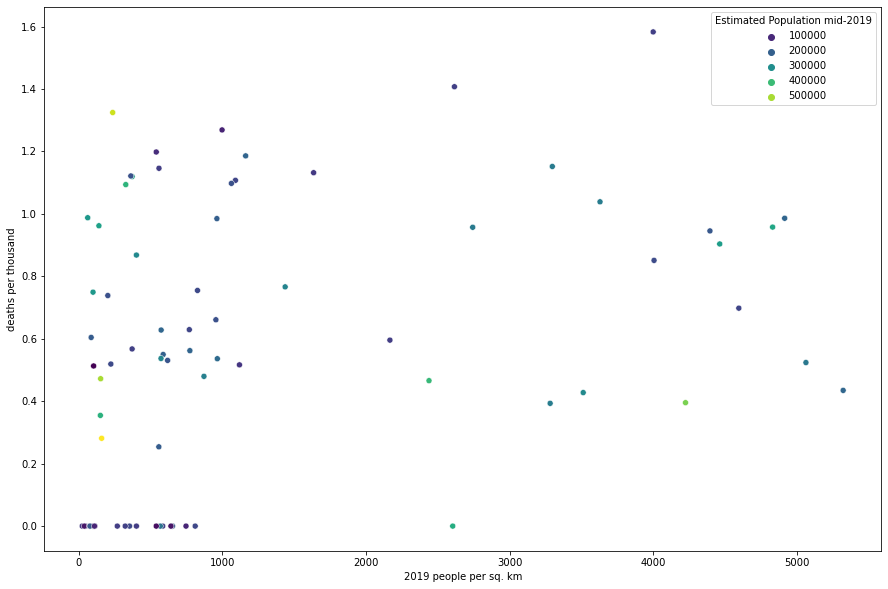

In [168]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='2019 people per sq. km', y='deaths per thousand', hue='Estimated Population mid-2019', data=df[df['Geography1'] == 'Unitary Authority'], palette='viridis', )

In [171]:
df[df['Geography1'] == 'Unitary Authority'].corr()

,Area (sq km),Estimated Population mid-2019,2019 people per sq. km,newDeaths28DaysByDeathDate,deaths per thousand
Area (sq km),1.000000,0.329925,-0.449852,0.137027,-0.145027
Estimated Population mid-2019,0.329925,1.000000,0.173156,0.655158,0.220191
2019 people per sq. km,-0.449852,0.173156,1.000000,0.235823,0.328245
newDeaths28DaysByDeathDate,0.137027,0.655158,0.235823,1.000000,0.779422
deaths per thousand,-0.145027,0.220191,0.328245,0.779422,1.000000


<AxesSubplot:>

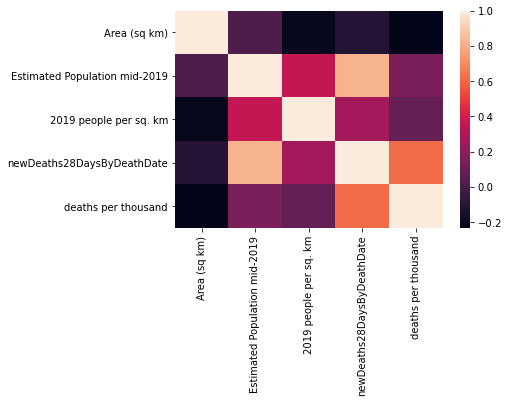

In [125]:
sns.heatmap(df.corr())

In [182]:
sorted(df['Name'].values)

['Aberdeen City',
 'Aberdeenshire',
 'Adur',
 'Allerdale',
 'Amber Valley',
 'Angus',
 'Antrim and Newtownabbey',
 'Ards and North Down',
 'Argyll and Bute',
 'Armagh City, Banbridge and Craigavon',
 'Arun',
 'Ashfield',
 'Ashford',
 'Babergh',
 'Barking and Dagenham',
 'Barnet',
 'Barnsley',
 'Barrow-in-Furness',
 'Basildon',
 'Basingstoke and Deane',
 'Bassetlaw',
 'Bath and North East Somerset',
 'Bedford',
 'Belfast',
 'Bexley',
 'Birmingham',
 'Blaby',
 'Blackburn with Darwen',
 'Blackpool',
 'Blaenau Gwent',
 'Bolsover',
 'Bolton',
 'Boston',
 'Bournemouth, Christchurch and Poole',
 'Bracknell Forest',
 'Bradford',
 'Braintree',
 'Breckland',
 'Brent',
 'Brentwood',
 'Bridgend',
 'Brighton and Hove',
 'Bristol, City of',
 'Broadland',
 'Bromley',
 'Bromsgrove',
 'Broxbourne',
 'Broxtowe',
 'Burnley',
 'Bury',
 'Caerphilly',
 'Calderdale',
 'Cambridge',
 'Camden',
 'Cannock Chase',
 'Canterbury',
 'Cardiff',
 'Carlisle',
 'Carmarthenshire',
 'Castle Point',
 'Causeway Coast and Gl

<AxesSubplot:xlabel='2019 people per sq. km', ylabel='Count'>

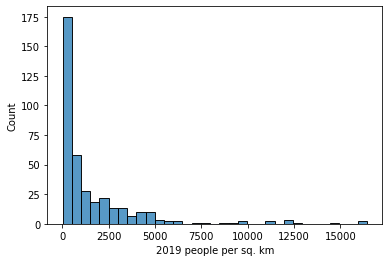

In [135]:
sns.histplot(data=df, x='2019 people per sq. km')

In [141]:
df.min()

Code                                 E06000001
Name                             Aberdeen City
Geography1                        Council Area
Area (sq km)                                12
Estimated Population mid-2019            22270
2019 people per sq. km                       9
newDeaths28DaysByDeathDate                   0
deaths per thousand                          0
dtype: object

<AxesSubplot:xlabel='2019 people per sq. km', ylabel='Geography1'>

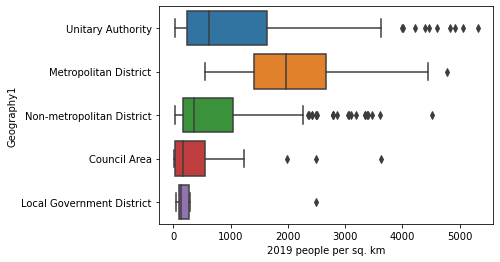

In [165]:
sns.boxplot(x='2019 people per sq. km', y='Geography1', data=df[df['Geography1']!='London Borough'])

In [147]:
df['Geography1'].value_counts()

Non-metropolitan District    188
Unitary Authority             77
Metropolitan District         36
London Borough                32
Council Area                  32
Local Government District     11
Name: Geography1, dtype: int64

In [163]:
df.head()

,Code,Name,Geography1,Area (sq km),Estimated Population mid-2019,2019 people per sq. km,newDeaths28DaysByDeathDate,deaths per thousand
9,E06000047,County Durham,Unitary Authority,2226,530094,238,702.0,1.324528
10,E06000005,Darlington,Unitary Authority,197,106803,541,127.0,1.198113
11,E06000001,Hartlepool,Unitary Authority,94,93663,999,118.0,1.268817
12,E06000002,Middlesbrough,Unitary Authority,54,140980,2616,197.0,1.407143
13,E06000057,Northumberland,Unitary Authority,5018,322434,64,318.0,0.987578


In [197]:
utla_deaths = pd.read_csv('utla_deaths_2020-11-22.csv')

In [220]:
utla_deaths_cum = utla_deaths.groupby(['areaCode','areaName']).sum().drop(['cumDeaths28DaysByDeathDate','cumDeathsByDeathDate','newDeathsByDeathDate'], axis=1)

In [204]:
utla_deaths.value_counts('areaType')

areaType
utla    69875
dtype: int64

In [206]:
deaths.value_counts('areaType')

areaType
ltla    123825
dtype: int64

In [208]:
deaths['areaType'].unique()

array(['ltla'], dtype=object)

In [215]:
utla_df = pops.merge(utla_deaths.groupby('areaCode').sum(), left_on='Code', right_index=True).drop(['cumDeaths28DaysByDeathDate','cumDeathsByDeathDate','newDeathsByDeathDate'], axis=1)

In [216]:
utla_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 9 to 429
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code                           213 non-null    object 
 1   Name                           213 non-null    object 
 2   Geography1                     213 non-null    object 
 3   Area (sq km)                   213 non-null    object 
 4   Estimated Population mid-2019  213 non-null    object 
 5   2019 people per sq. km         213 non-null    object 
 6   newDeaths28DaysByDeathDate     213 non-null    float64
dtypes: float64(1), object(6)
memory usage: 13.3+ KB


In [217]:
utla_df['Geography1'].unique()

array(['Unitary Authority', 'Metropolitan District', 'County',
       'London Borough', 'Council Area', 'Local Government District'],
      dtype=object)

In [224]:
utla_deaths_cum

,,newDeaths28DaysByDeathDate
areaCode,areaName,
E06000001,Hartlepool,118.0
E06000002,Middlesbrough,197.0
E06000003,Redcar and Cleveland,157.0
E06000004,Stockton-on-Tees,194.0
E06000005,Darlington,127.0
...,...,...
W06000020,Torfaen,0.0
W06000021,Monmouthshire,0.0
W06000022,Newport,0.0


In [226]:
ltla_deaths_cum = deaths.groupby(['areaCode','areaName']).sum()

In [227]:
ltla_deaths_cum

,,newDeaths28DaysByDeathDate
areaCode,areaName,
E06000001,Hartlepool,118.0
E06000002,Middlesbrough,197.0
E06000003,Redcar and Cleveland,157.0
E06000004,Stockton-on-Tees,194.0
E06000005,Darlington,127.0
...,...,...
W06000020,Torfaen,0.0
W06000021,Monmouthshire,0.0
W06000022,Newport,0.0


In [232]:
all_tiers = utla_deaths_cum.merge(ltla_deaths_cum, how='outer', left_index=True, right_index=True)

In [251]:
all_tiers[all_tiers['newDeaths28DaysByDeathDate_y'].isna()]

,,newDeaths28DaysByDeathDate_x,newDeaths28DaysByDeathDate_y,cumulativeDeaths
areaCode,areaName,,,
E10000002,Buckinghamshire,297.0,NaN,297.0
E10000003,Cambridgeshire,319.0,NaN,319.0
E10000006,Cumbria,522.0,NaN,522.0
E10000007,Derbyshire,811.0,NaN,811.0
E10000008,Devon,203.0,NaN,203.0
E10000011,East Sussex,264.0,NaN,264.0
E10000012,Essex,1368.0,NaN,1368.0
E10000013,Gloucestershire,448.0,NaN,448.0
E10000014,Hampshire,832.0,NaN,832.0


In [249]:
all_tiers['cumulativeDeaths'] = all_tiers['newDeaths28DaysByDeathDate_y'].fillna(all_tiers['newDeaths28DaysByDeathDate_x'])

In [257]:
all_tiers = all_tiers.reset_index(level=1)

In [284]:
dfat = pops.merge(all_tiers[['areaName','cumulativeDeaths']], left_on='Code', right_index=True)

In [285]:
dfat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 9 to 429
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code                           401 non-null    object 
 1   Name                           401 non-null    object 
 2   Geography1                     401 non-null    object 
 3   Area (sq km)                   401 non-null    object 
 4   Estimated Population mid-2019  401 non-null    object 
 5   2019 people per sq. km         401 non-null    object 
 6   areaName                       401 non-null    object 
 7   cumulativeDeaths               401 non-null    float64
dtypes: float64(1), object(7)
memory usage: 28.2+ KB


In [286]:
dfat = dfat[['Code','Name','areaName','Geography1','Area (sq km)','Estimated Population mid-2019','2019 people per sq. km','cumulativeDeaths']]

In [267]:
dfat[dfat['Name']!=dfat['areaName']]

,Code,Name,areaName,Geography1,Area (sq km),Estimated Population mid-2019,2019 people per sq. km,cumulativeDeaths
226,E09000012,Hackney,Hackney and City of London,London Borough,19,281120,14758,183.0
332,E06000052,Cornwall,Cornwall and Isles of Scilly,Unitary Authority,3545,569578,161,160.0
405,S12000013,Na h-Eileanan Siar,Comhairle nan Eilean Siar,Council Area,3056,26720,9,1.0


In [287]:
dfat = dfat.drop('Name',axis=1)

In [288]:
dfat[dfat.columns[3:]]=dfat[dfat.columns[3:]].astype(int)

In [290]:
dfat['deaths per 1000'] = dfat['cumulativeDeaths']/(dfat['Estimated Population mid-2019']//1000)

In [293]:
dfat['deaths per 1000']=dfat['deaths per 1000'].round(1)

In [303]:
dfat[dfat['Geography1']=='County'].corr()

,Area (sq km),Estimated Population mid-2019,2019 people per sq. km,cumulativeDeaths,deaths per 1000
Area (sq km),1.000000,-0.127854,-0.702369,-0.217962,-0.187596
Estimated Population mid-2019,-0.127854,1.000000,0.629592,0.838263,0.229775
2019 people per sq. km,-0.702369,0.629592,1.000000,0.609977,0.283079
cumulativeDeaths,-0.217962,0.838263,0.609977,1.000000,0.698489
deaths per 1000,-0.187596,0.229775,0.283079,0.698489,1.000000


<AxesSubplot:>

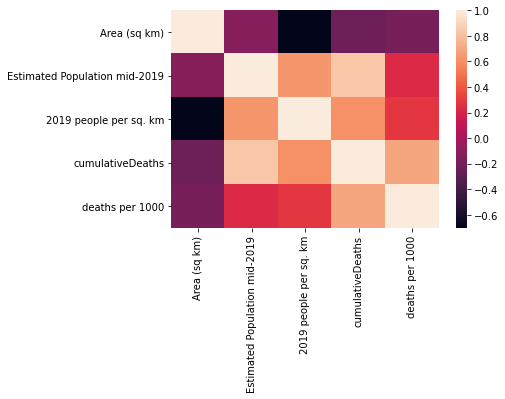

In [302]:
sns.heatmap(dfat[dfat['Geography1']=='County'].corr())

In [296]:
dfat['Geography1'].value_counts()

Non-metropolitan District    188
Unitary Authority             77
Metropolitan District         36
London Borough                32
Council Area                  32
County                        25
Local Government District     11
Name: Geography1, dtype: int64

In [297]:
df['Geography1'].value_counts()

Non-metropolitan District    188
Unitary Authority             77
Metropolitan District         36
London Borough                32
Council Area                  32
Local Government District     11
Name: Geography1, dtype: int64

<AxesSubplot:xlabel='deaths per 1000', ylabel='Geography1'>

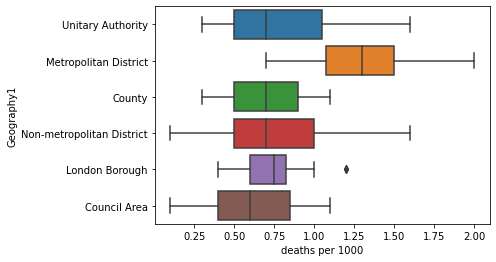

In [300]:
sns.boxplot(data=dfat[dfat['deaths per 1000']>0], y='Geography1', x='deaths per 1000')

<AxesSubplot:xlabel='newDeathsByDeathDate', ylabel='areaName'>

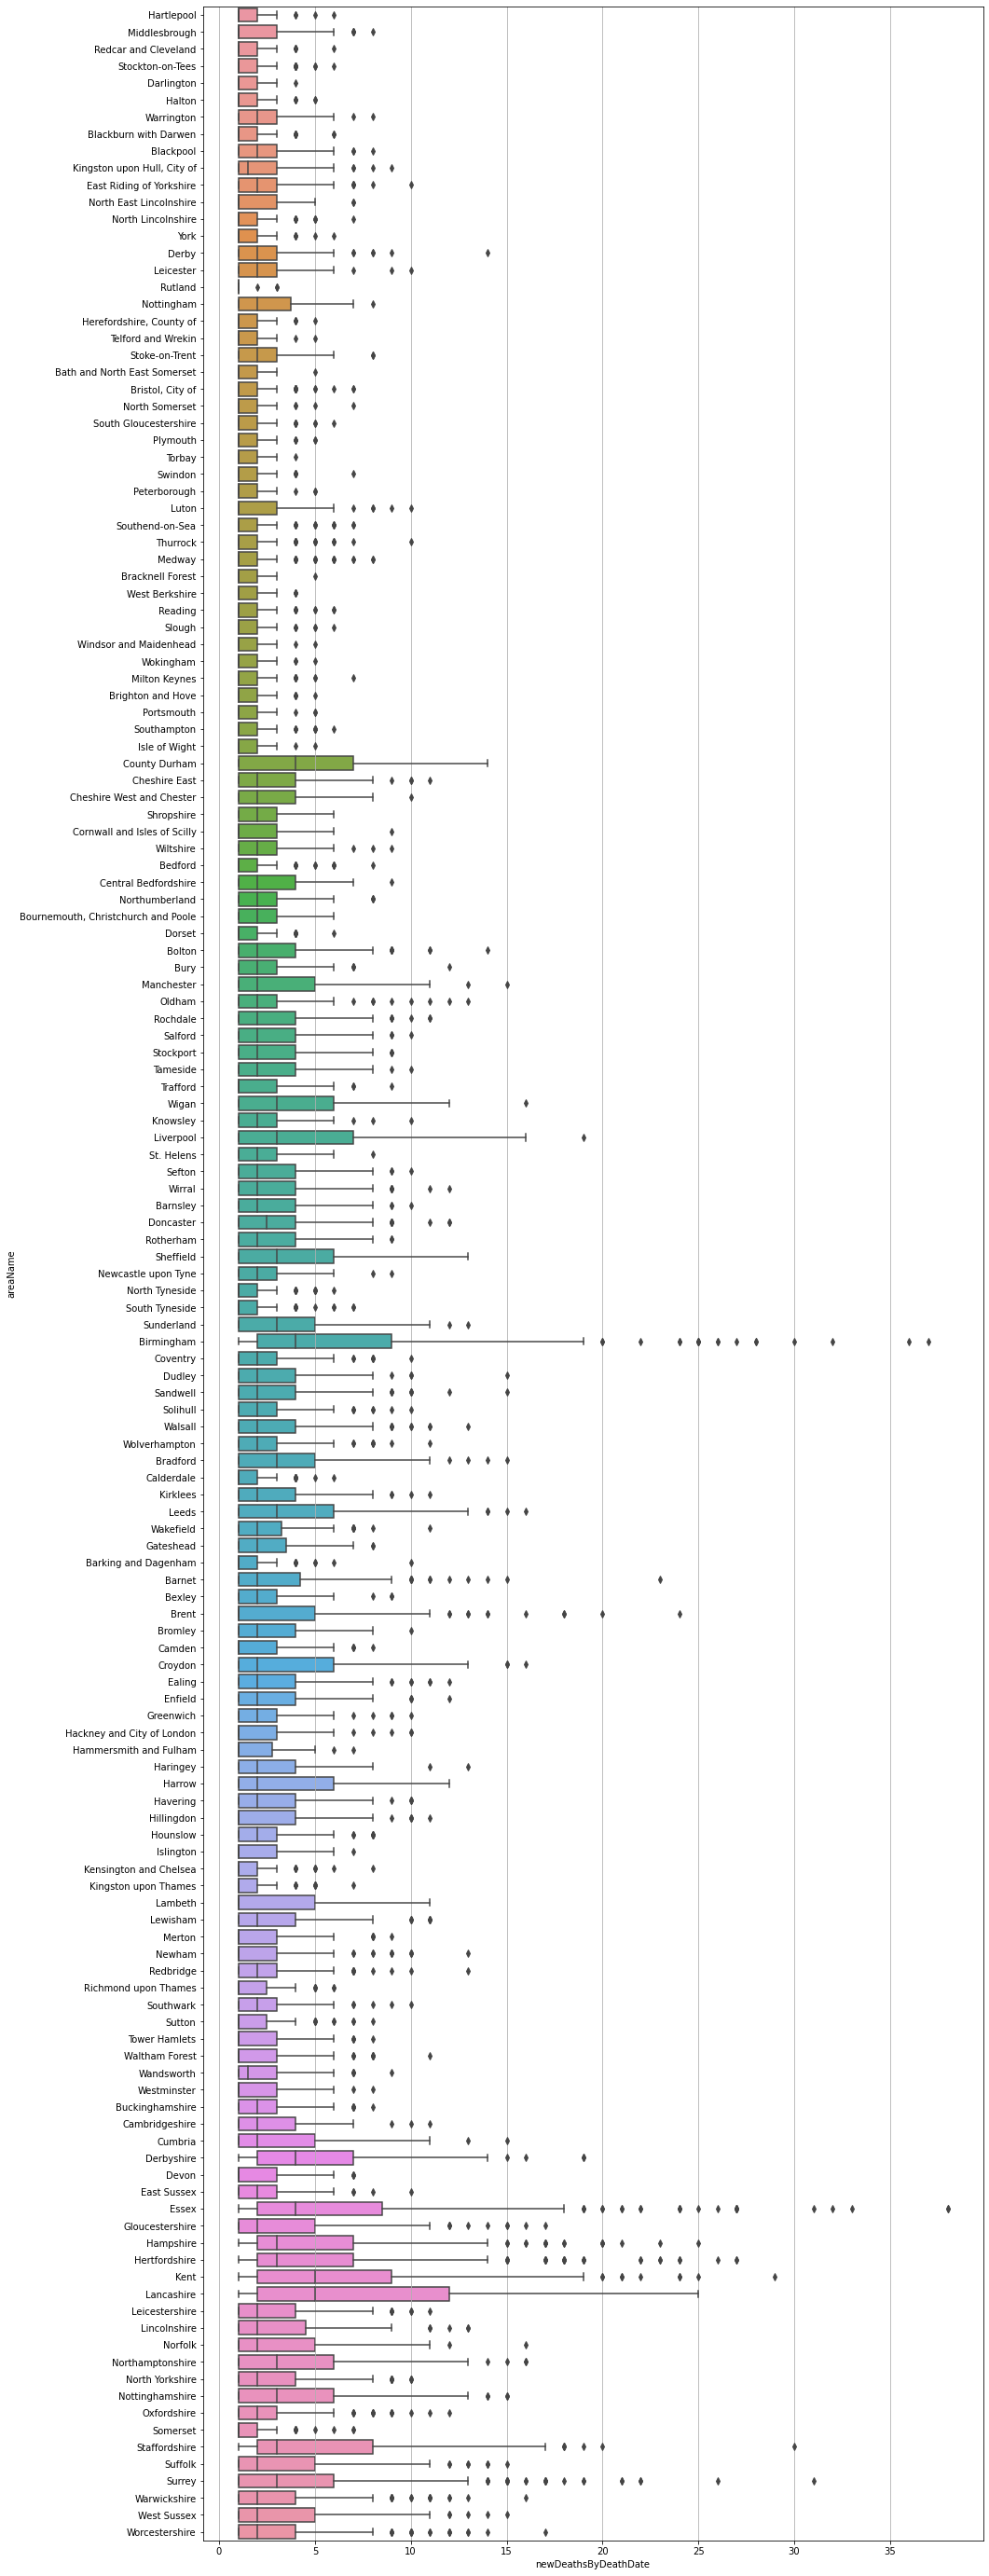

In [308]:
plt.figure(figsize=(15,50))
plt.grid(True)
sns.boxplot(data=utla_deaths[utla_deaths['newDeathsByDeathDate']>0], x='newDeathsByDeathDate', y='areaName')

In [313]:
utla_deaths[utla_deaths['areaName']=='Southampton'].describe()

,cumDeaths28DaysByDeathDate,cumDeathsByDeathDate,newDeaths28DaysByDeathDate,newDeathsByDeathDate
count,252.000000,252.000000,252.000000,252.000000
mean,104.837302,119.662698,0.523810,0.650794
std,36.588610,44.800680,1.069045,1.091930
min,1.000000,1.000000,0.000000,0.000000
25%,101.750000,105.750000,0.000000,0.000000
50%,122.000000,138.000000,0.000000,0.000000
75%,123.000000,146.000000,1.000000,1.000000
max,132.000000,164.000000,6.000000,6.000000


In [314]:
utla_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69875 entries, 0 to 69874
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        69875 non-null  object 
 1   areaType                    69875 non-null  object 
 2   areaCode                    69550 non-null  object 
 3   areaName                    69875 non-null  object 
 4   cumDeaths28DaysByDeathDate  45786 non-null  float64
 5   cumDeathsByDeathDate        37210 non-null  float64
 6   newDeaths28DaysByDeathDate  45786 non-null  float64
 7   newDeathsByDeathDate        37210 non-null  float64
dtypes: float64(4), object(4)
memory usage: 4.3+ MB


<AxesSubplot:xlabel='date', ylabel='cumDeaths28DaysByDeathDate'>

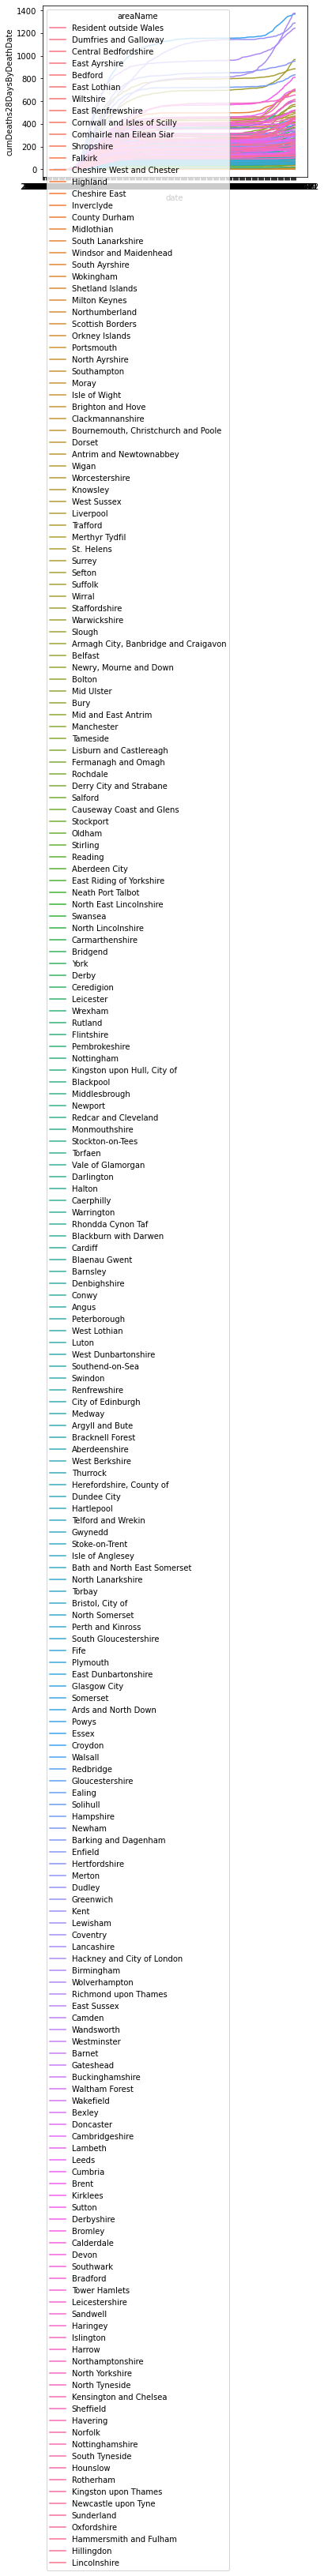

In [317]:
sns.lineplot(x='date', y='cumDeaths28DaysByDeathDate', data=utla_deaths.sort_values('date'), hue='areaName')